In [1]:
import cv2
import numpy as np
from sklearn.utils import shuffle
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from utils.utils import load_dataset, download_dataset, create_cnn_model, get_callbacks, get_preds, show_train_loss_accuracy, show_metrics, INPUT_SHAPE, OUTPUT_CLASSES
%matplotlib inline
warnings.filterwarnings('ignore')

2025-09-15 01:39:23.653803: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-15 01:39:24.296661: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/cenzi/Área de trabalho/Aulas/tcc/venv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/home/cenzi/Área de trabalho/Aulas/tcc/venv/lib/python3.13/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exa

In [2]:
DATA_PATH = "./data"
TRAIN_PATH = os.path.join(DATA_PATH, "train")
TEST_PATH = os.path.join(DATA_PATH, "test")

In [6]:
download_dataset(DATA_PATH)

✅ Dataset já existe em: ./data
Pulando download...


In [5]:
exclude_class = ['disgust']
X_train, y_train, LABEL_MAP = load_dataset(TRAIN_PATH, exclude_class)
X_test, y_test, _ = load_dataset(TEST_PATH, exclude_class)

X_train.shape, y_train.shape, LABEL_MAP

((28273, 48, 48, 3),
 (28273,),
 {'angry': 0, 'fear': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprise': 5})

In [7]:
from tensorflow.keras.applications import VGG19, DenseNet201, ResNet50V2

resnet50v2 = create_cnn_model(
    ResNet50V2(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling=None,
    classes=OUTPUT_CLASSES,
    classifier_activation="softmax"
), OUTPUT_CLASSES)

denseNet201 = create_cnn_model(DenseNet201(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling=None,
    classes=OUTPUT_CLASSES,
    classifier_activation="softmax"
), OUTPUT_CLASSES)

vgg19 = create_cnn_model(VGG19(
    include_top=False,
    weights="imagenet",
    input_shape=INPUT_SHAPE,
    pooling=None,
    classes=OUTPUT_CLASSES,
    classifier_activation="softmax"
), OUTPUT_CLASSES)

models = {
    "ResNet50v2": resnet50v2,
    "DenseNet201": denseNet201,
    "VGG19": vgg19,
    
}

2025-09-15 01:42:33.738512: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [8]:
from tensorflow.keras.utils import to_categorical

BATCH_SIZE = 32
EPOCHS = 60
histories = {}

# Normaliza
X_train_resized = X_train.astype("float32") / 255.0
X_test_resized = X_test.astype("float32") / 255.0

# One-hot
y_train_cat = to_categorical(y_train, num_classes=OUTPUT_CLASSES)
y_test_cat = to_categorical(y_test, num_classes=OUTPUT_CLASSES)

for model_name, model in models.items():
    print(f"STRAT TRAINING MODEL {model_name}...")
    histories[model_name] = model.fit(X_train_resized, y_train_cat,
                                     validation_split=0.2,
                                     epochs=EPOCHS,
                                     batch_size=BATCH_SIZE,
                                     callbacks=get_callbacks(model_name))
    print(f"FINISH TRAINING MODEL {model_name}!")
    print("---------------------------------------------------------------")

STRAT TRAINING MODEL ResNet50v2...
Epoch 1/60


2025-09-15 01:44:32.878143: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 625342464 exceeds 10% of free system memory.


706/707 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2141 - loss: 3.1228

2025-09-15 01:45:20.480971: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 156349440 exceeds 10% of free system memory.


707/707 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.2277 - loss: 2.7620 - val_accuracy: 0.3031 - val_loss: 1.8780 - learning_rate: 1.0000e-04
Epoch 2/60
707/707 ━━━━━━━━━━━━━━━━━━━━ 52s 73ms/step - accuracy: 0.2716 - loss: 2.1534 - val_accuracy: 0.3326 - val_loss: 1.7398 - learning_rate: 1.0000e-04
Epoch 3/60
707/707 ━━━━━━━━━━━━━━━━━━━━ 52s 73ms/step - accuracy: 0.3095 - loss: 1.9097 - val_accuracy: 0.3560 - val_loss: 1.6645 - learning_rate: 1.0000e-04
Epoch 4/60
707/707 ━━━━━━━━━━━━━━━━━━━━ 52s 74ms/step - accuracy: 0.3347 - loss: 1.7781 - val_accuracy: 0.3655 - val_loss: 1.6203 - learning_rate: 1.0000e-04
Epoch 5/60
707/707 ━━━━━━━━━━━━━━━━━━━━ 52s 73ms/step - accuracy: 0.3509 - loss: 1.7041 - val_accuracy: 0.3683 - val_loss: 1.6007 - learning_rate: 1.0000e-04
Epoch 6/60
707/707 ━━━━━━━━━━━━━━━━━━━━ 52s 73ms/step - accuracy: 0.3651 - loss: 1.6401 - val_accuracy: 0.3728 - val_loss: 1.5763 - learning_rate: 1.0000e-04
Epoch 7/60
707/707 ━━━━━━━━━━━━━━━━━━━━ 52s 73ms/step - accurac

2025-09-15 02:08:58.647005: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 625342464 exceeds 10% of free system memory.


707/707 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.2337 - loss: 1.8584

2025-09-15 02:10:23.107544: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 156349440 exceeds 10% of free system memory.


707/707 ━━━━━━━━━━━━━━━━━━━━ 109s 127ms/step - accuracy: 0.2620 - loss: 1.7899 - val_accuracy: 0.3312 - val_loss: 1.6469 - learning_rate: 1.0000e-04
Epoch 2/60
707/707 ━━━━━━━━━━━━━━━━━━━━ 83s 118ms/step - accuracy: 0.3179 - loss: 1.6733 - val_accuracy: 0.3500 - val_loss: 1.5979 - learning_rate: 1.0000e-04
Epoch 3/60
707/707 ━━━━━━━━━━━━━━━━━━━━ 83s 118ms/step - accuracy: 0.3453 - loss: 1.6240 - val_accuracy: 0.3687 - val_loss: 1.5747 - learning_rate: 1.0000e-04
Epoch 4/60
707/707 ━━━━━━━━━━━━━━━━━━━━ 83s 118ms/step - accuracy: 0.3587 - loss: 1.5949 - val_accuracy: 0.3745 - val_loss: 1.5594 - learning_rate: 1.0000e-04
Epoch 5/60
707/707 ━━━━━━━━━━━━━━━━━━━━ 83s 118ms/step - accuracy: 0.3680 - loss: 1.5739 - val_accuracy: 0.3823 - val_loss: 1.5440 - learning_rate: 1.0000e-04
Epoch 6/60
707/707 ━━━━━━━━━━━━━━━━━━━━ 84s 119ms/step - accuracy: 0.3795 - loss: 1.5582 - val_accuracy: 0.3836 - val_loss: 1.5357 - learning_rate: 1.0000e-04
Epoch 7/60
707/707 ━━━━━━━━━━━━━━━━━━━━ 83s 117ms/step -

2025-09-15 03:28:14.545574: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 625342464 exceeds 10% of free system memory.


707/707 ━━━━━━━━━━━━━━━━━━━━ 142s 199ms/step - accuracy: 0.1998 - loss: 1.9730 - val_accuracy: 0.2874 - val_loss: 1.7198 - learning_rate: 1.0000e-04
Epoch 2/60
707/707 ━━━━━━━━━━━━━━━━━━━━ 140s 198ms/step - accuracy: 0.2605 - loss: 1.7721 - val_accuracy: 0.3183 - val_loss: 1.6665 - learning_rate: 1.0000e-04
Epoch 3/60
707/707 ━━━━━━━━━━━━━━━━━━━━ 140s 198ms/step - accuracy: 0.2929 - loss: 1.7058 - val_accuracy: 0.3245 - val_loss: 1.6411 - learning_rate: 1.0000e-04
Epoch 4/60
707/707 ━━━━━━━━━━━━━━━━━━━━ 140s 198ms/step - accuracy: 0.3061 - loss: 1.6763 - val_accuracy: 0.3399 - val_loss: 1.6229 - learning_rate: 1.0000e-04
Epoch 5/60
707/707 ━━━━━━━━━━━━━━━━━━━━ 140s 198ms/step - accuracy: 0.3207 - loss: 1.6528 - val_accuracy: 0.3427 - val_loss: 1.6113 - learning_rate: 1.0000e-04
Epoch 6/60
707/707 ━━━━━━━━━━━━━━━━━━━━ 140s 198ms/step - accuracy: 0.3260 - loss: 1.6433 - val_accuracy: 0.3489 - val_loss: 1.6025 - learning_rate: 1.0000e-04
Epoch 7/60
707/707 ━━━━━━━━━━━━━━━━━━━━ 140s 198ms/

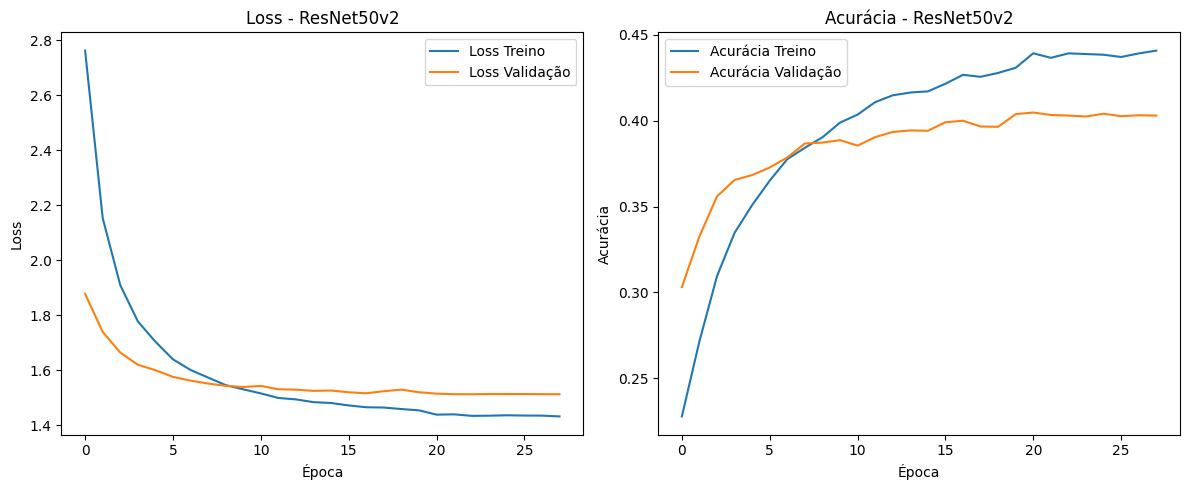

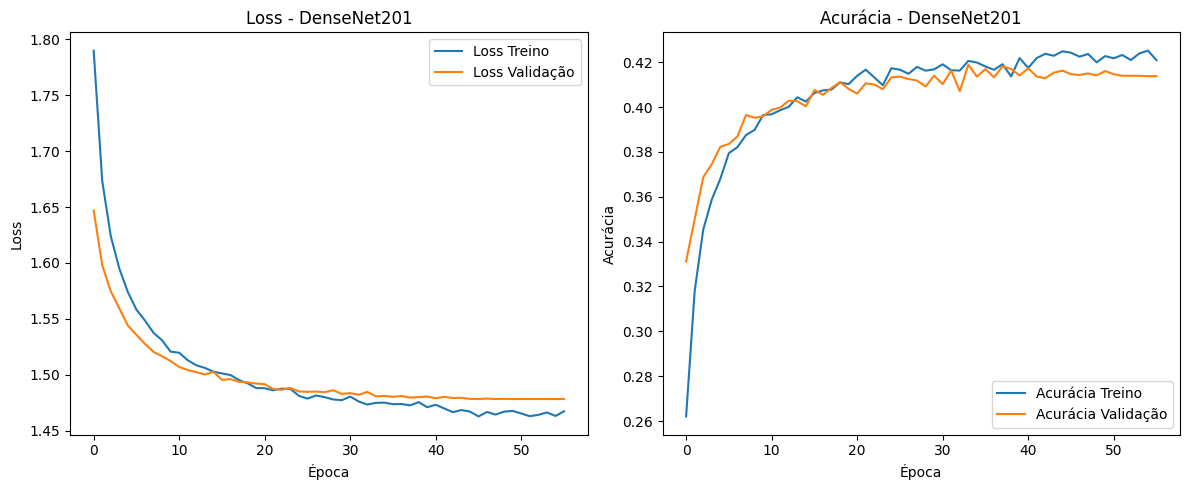

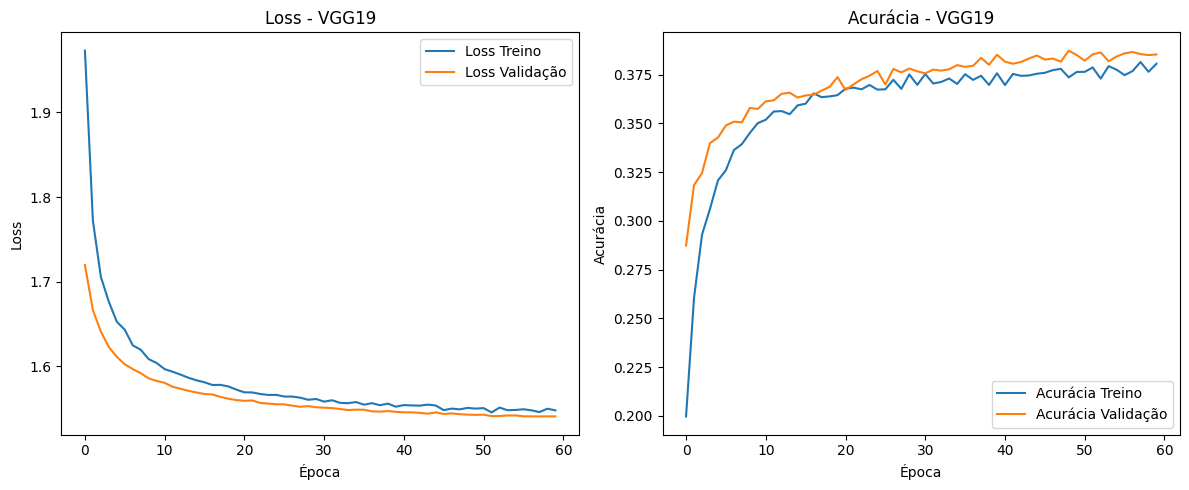

In [9]:
for model_name, history in histories.items():
    show_train_loss_accuracy(history, model_name)

In [10]:
y_preds = {}
for model_name, model in models.items():
    y_preds[model_name] = get_preds(X_train_resized, model)

884/884 ━━━━━━━━━━━━━━━━━━━━ 52s 57ms/step
884/884 ━━━━━━━━━━━━━━━━━━━━ 90s 95ms/step
884/884 ━━━━━━━━━━━━━━━━━━━━ 139s 157ms/step


Métricas do modelo: ResNet50v2
Accuracy Score:   0.4589
Precision Score:  0.4533
Recall Score:     0.4278
F1 Score:         0.4279

Classification Report:

              precision    recall  f1-score   support

           0       0.42      0.25      0.32      3995
           1       0.41      0.23      0.30      4097
           2       0.48      0.75      0.58      7215
           3       0.44      0.40      0.42      4965
           4       0.41      0.41      0.41      4830
           5       0.56      0.53      0.54      3171

    accuracy                           0.46     28273
   macro avg       0.45      0.43      0.43     28273
weighted avg       0.45      0.46      0.44     28273


Acurácia por classe:
- angry: 25.38%
- fear: 23.46%
- happy: 74.62%
- neutral: 39.56%
- sad: 41.10%
- surprise: 52.54%


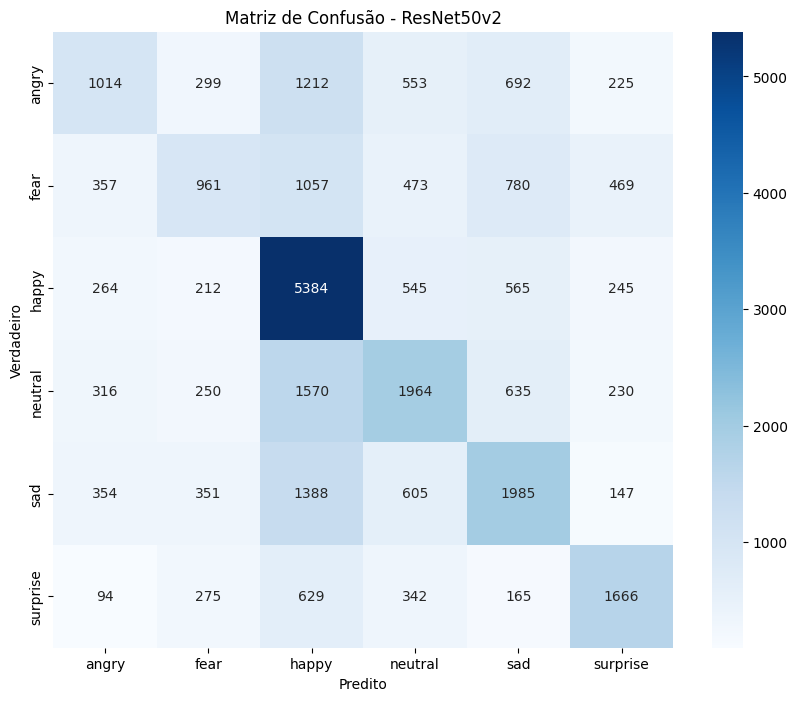

Métricas do modelo: DenseNet201
Accuracy Score:   0.4443
Precision Score:  0.4386
Recall Score:     0.4138
F1 Score:         0.4142

Classification Report:

              precision    recall  f1-score   support

           0       0.40      0.25      0.31      3995
           1       0.38      0.22      0.28      4097
           2       0.46      0.73      0.57      7215
           3       0.42      0.38      0.40      4965
           4       0.39      0.38      0.39      4830
           5       0.57      0.52      0.54      3171

    accuracy                           0.44     28273
   macro avg       0.44      0.41      0.41     28273
weighted avg       0.44      0.44      0.43     28273


Acurácia por classe:
- angry: 24.83%
- fear: 22.46%
- happy: 73.49%
- neutral: 37.66%
- sad: 37.89%
- surprise: 51.97%


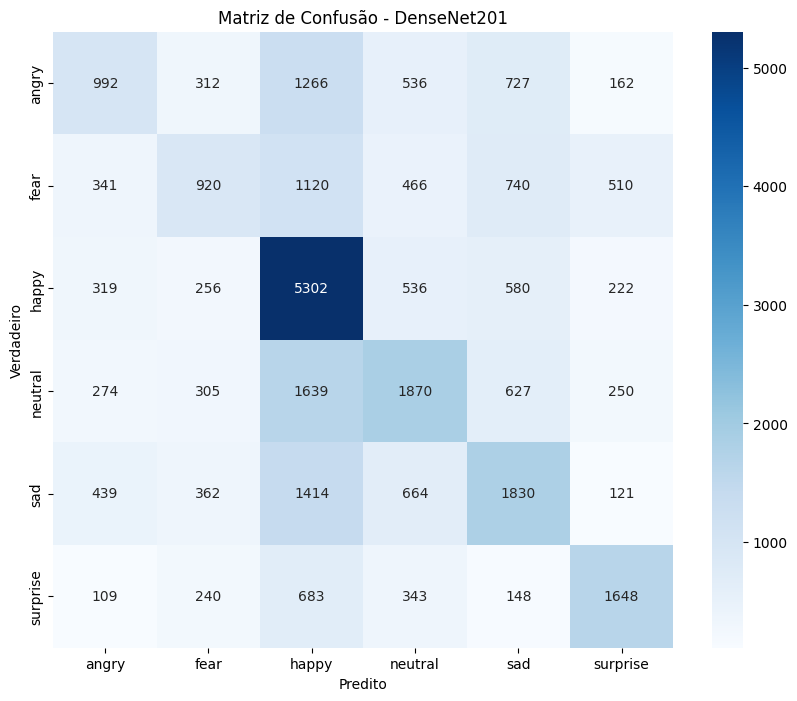

Métricas do modelo: VGG19
Accuracy Score:   0.3978
Precision Score:  0.3941
Recall Score:     0.3637
F1 Score:         0.3569

Classification Report:

              precision    recall  f1-score   support

           0       0.36      0.14      0.21      3995
           1       0.37      0.16      0.22      4097
           2       0.41      0.72      0.52      7215
           3       0.37      0.32      0.34      4965
           4       0.35      0.36      0.35      4830
           5       0.50      0.49      0.50      3171

    accuracy                           0.40     28273
   macro avg       0.39      0.36      0.36     28273
weighted avg       0.39      0.40      0.37     28273


Acurácia por classe:
- angry: 14.49%
- fear: 16.08%
- happy: 71.67%
- neutral: 31.82%
- sad: 35.51%
- surprise: 48.66%


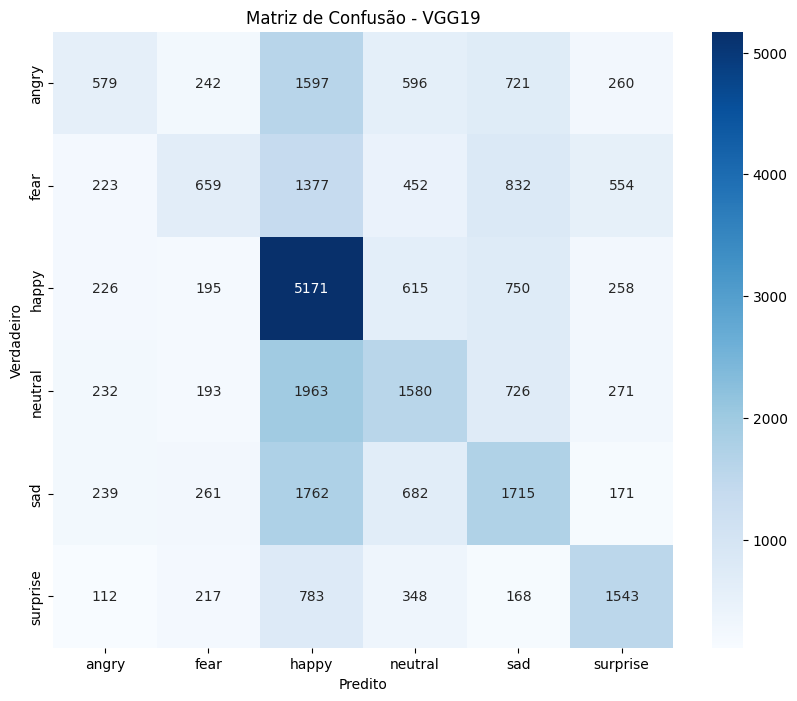

In [11]:
metrics = {}
for model_name, preds in y_preds.items():
    metrics[model_name] = show_metrics(y_train, preds, model_name, "confusion_matrix_sem_nojo", LABEL_MAP)

In [12]:
y_preds_teste = {}
for model_name, model in models.items():
    y_preds_teste[model_name] = get_preds(X_test_resized, model)

221/221 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step
221/221 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step
221/221 ━━━━━━━━━━━━━━━━━━━━ 35s 156ms/step


Métricas do modelo: ResNet50v2
Accuracy Score:   0.4172
Precision Score:  0.3991
Recall Score:     0.3868
F1 Score:         0.3834

Classification Report:

              precision    recall  f1-score   support

           0       0.33      0.22      0.26       958
           1       0.32      0.19      0.24      1024
           2       0.46      0.72      0.56      1774
           3       0.38      0.33      0.35      1233
           4       0.36      0.35      0.35      1247
           5       0.55      0.52      0.53       831

    accuracy                           0.42      7067
   macro avg       0.40      0.39      0.38      7067
weighted avg       0.40      0.42      0.40      7067


Acurácia por classe:
- angry: 21.50%
- fear: 18.95%
- happy: 71.76%
- neutral: 33.33%
- sad: 34.80%
- surprise: 51.74%


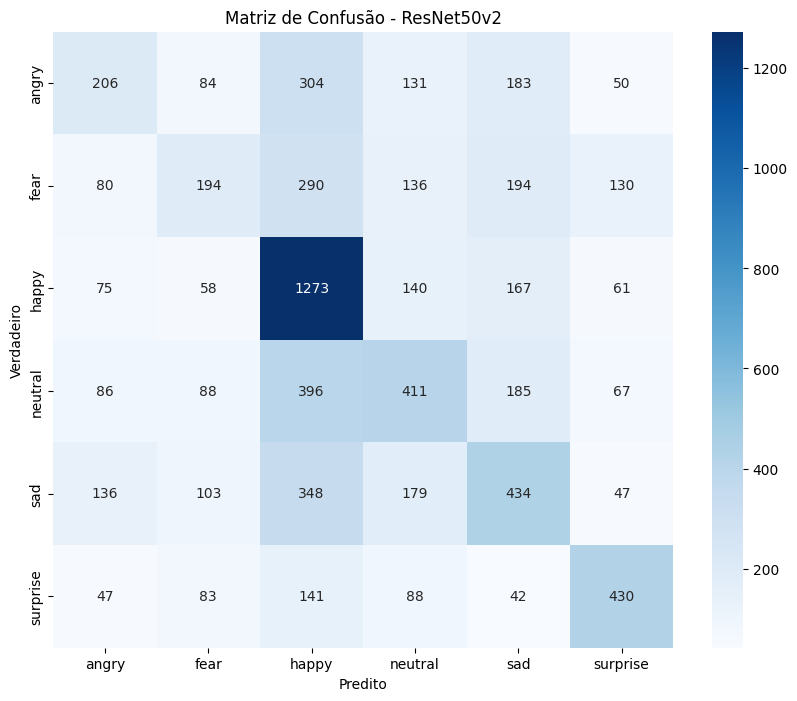

Métricas do modelo: DenseNet201
Accuracy Score:   0.4211
Precision Score:  0.4063
Recall Score:     0.3904
F1 Score:         0.3889

Classification Report:

              precision    recall  f1-score   support

           0       0.32      0.21      0.26       958
           1       0.29      0.19      0.23      1024
           2       0.45      0.72      0.56      1774
           3       0.39      0.33      0.36      1233
           4       0.40      0.37      0.38      1247
           5       0.59      0.52      0.55       831

    accuracy                           0.42      7067
   macro avg       0.41      0.39      0.39      7067
weighted avg       0.41      0.42      0.40      7067


Acurácia por classe:
- angry: 21.40%
- fear: 18.65%
- happy: 71.65%
- neutral: 33.50%
- sad: 37.45%
- surprise: 51.62%


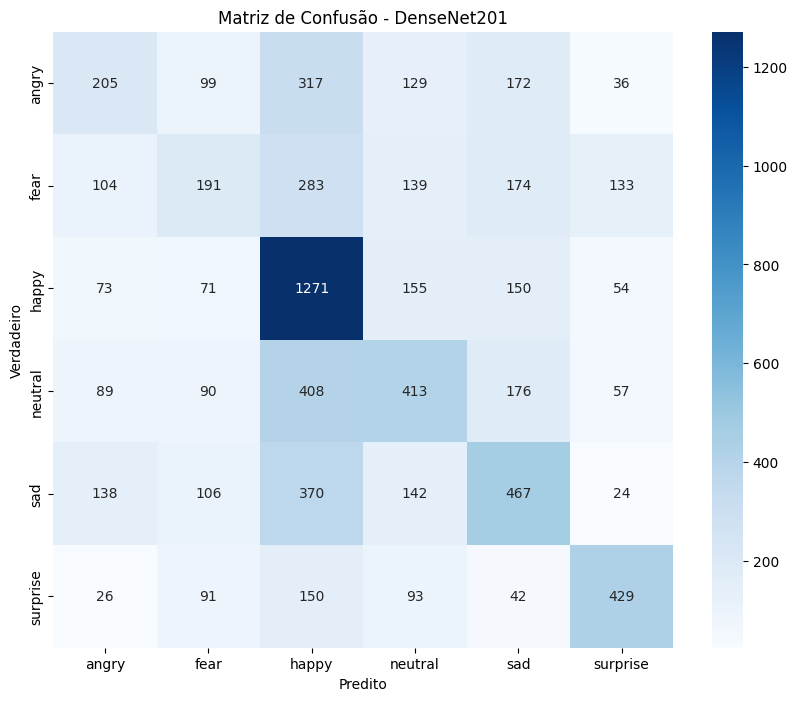

Métricas do modelo: VGG19
Accuracy Score:   0.3811
Precision Score:  0.37
Recall Score:     0.3474
F1 Score:         0.3389

Classification Report:

              precision    recall  f1-score   support

           0       0.31      0.13      0.18       958
           1       0.31      0.13      0.19      1024
           2       0.39      0.70      0.50      1774
           3       0.34      0.30      0.32      1233
           4       0.35      0.34      0.35      1247
           5       0.52      0.49      0.50       831

    accuracy                           0.38      7067
   macro avg       0.37      0.35      0.34      7067
weighted avg       0.37      0.38      0.35      7067


Acurácia por classe:
- angry: 12.63%
- fear: 13.28%
- happy: 69.67%
- neutral: 30.01%
- sad: 34.00%
- surprise: 48.86%


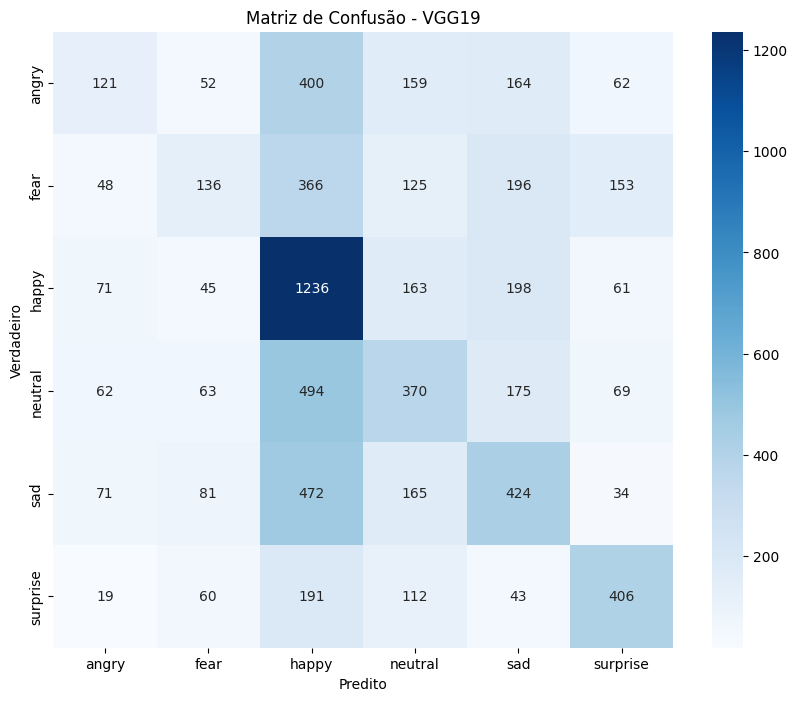

In [13]:
metrics_teste = {}
for model_name, preds in y_preds_teste.items():
    metrics_teste[model_name] = show_metrics(y_test, preds, model_name, "confusion_matrix_sem_nojo", LABEL_MAP, is_test=True)